<font size='+4'><b> TP 1 -- neural machine translation</b></font>

<font size='+2'>Words that occur insimilar contexts tend to have similar meanings.  This link between similarity in how words are distributed and similarity in  what  they  mean  is  called  <b>the distributional  hypothesis.</b> </font> (Joos (1950), Harris (1954), and Firth(1957))

<font size='+2'>In this practice we are going to instante this linguistic hypothesis by learning representations of the meaning of words directly from their distributions in texts and using some pre-trained representations.  <it> A word’s distribution is the set of contexts in which it occurs, the neighboring words or grammatical environments.  The idea is that two words that occur in very similar distributions (that occur together with very similar words) are likely to have the same meaning. </it></font>

<font size='+3'> Execute the following cell pressing CTRL+ENTER. Please, do not modify the cell </font>

In [2]:
from word2vec import set_parameters_to_train,train_model,load_model,get_similar_words, get_vocabulary, cosine_similarity_between_words, graphic_words, get_vector
from utils import add_corpus
%matplotlib notebook

<font size='+3'><b> Exercise 1: warm up </b></font><br><br>
<font size='+2'> Explore demo dataset cook_book_1 vectors. Remember,  press <b>ctrl+enter</b> to execute each cell. First we are going to load a word2vec model trained with cook receipts.

<ul>1. Load cook_book_1 model</ul>

</font>

In [3]:
model = load_model('w2v_models/cook_book_1.w2v')

<font size='+2'><ul>2. Get vector for the word 'carrot'. The dimension is 300.</ul></font>

In [4]:
get_vector('carrot')

array([ 0.25115064,  0.10831705, -0.21038935, -0.26342162,  0.09230331,
       -0.52915055, -0.09048733,  0.11246356,  0.5856856 , -0.7932605 ,
        0.02549587, -0.51880485, -0.72602767, -0.12674528, -0.03758147,
       -0.1037076 ,  0.26326856,  0.00346096, -0.3283233 , -0.6194691 ,
        0.5063874 , -0.5314458 , -0.8055872 , -0.23638466,  0.05681629,
       -0.8985168 , -0.45041937,  0.10177106,  0.05587293,  0.36102548,
       -0.26403782,  0.24080394,  0.69648063, -0.46412486,  0.62887204,
        0.3318471 ,  0.36068547,  0.4476656 , -0.4469574 ,  0.3460794 ,
        0.08948725,  0.3865981 ,  0.40045226, -0.58096504,  0.15390408,
       -0.3344922 , -0.48563445,  0.725269  ,  0.17551893,  0.5919023 ,
        0.07735718, -0.6651772 , -0.02065179,  0.6434426 ,  0.67763615,
       -0.14127606, -0.09677202,  1.0425562 , -0.45622703, -0.72569984,
        0.03447228, -0.5933446 , -0.56916106, -0.43269983,  0.107567  ,
        0.36758468, -0.65609753, -0.08638289, -0.86782604,  0.20

<font size='+2'><ul>2. Find 20 "closest" words to word 'carrot'.</ul></font>

In [5]:
get_similar_words('carrot', 20)

[('bunch', 0.9276268482208252),
 ('celery', 0.9146734476089478),
 ('leek', 0.9115024209022522),
 ('turnip', 0.9078171253204346),
 ('garlic', 0.8868895173072815),
 ('peeled', 0.8859602212905884),
 ('bayleaf', 0.8822449445724487),
 ('carrots', 0.8757370114326477),
 ('thyme', 0.8713407516479492),
 ('onion', 0.8675442934036255),
 ('cabbage', 0.8673239946365356),
 ('bundle', 0.8659937381744385),
 ('sliced', 0.8553050756454468),
 ('chervil', 0.8536331653594971),
 ('leaf', 0.8473303914070129),
 ('peppers', 0.8433750867843628),
 ('minced', 0.8424973487854004),
 ('bay', 0.8420938849449158),
 ('onions', 0.8417685031890869),
 ('bulbs', 0.8399118185043335)]

<font size='+2'><ul>3. Find the cosine similarity between 'man' and 'woman'.</ul></font>

In [6]:
cosine_similarity_between_words('man', 'woman')

0.9625550009402081

<font size='+2'><ul>4. Find 50 "closest" words to word 'carrot' and graphic them.</ul></font>

<IPython.core.display.Javascript object>


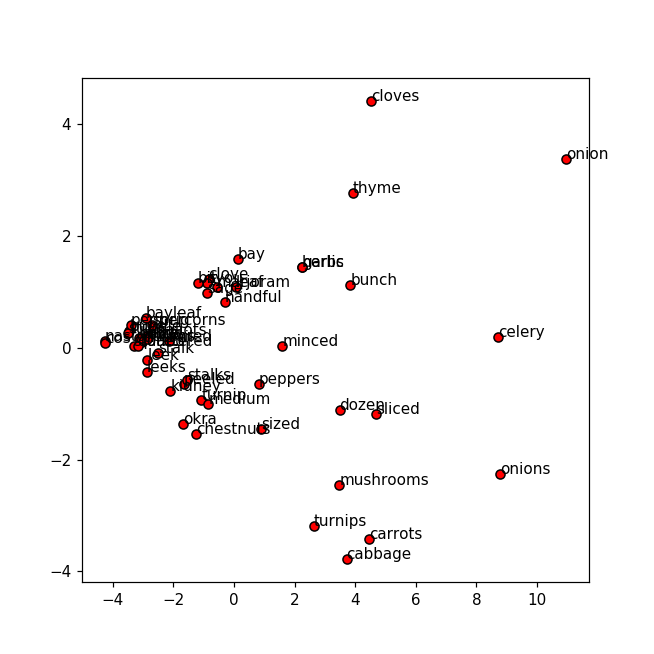

bunch (3.8431768, 1.1268386)
celery (8.70438, 0.19717366)
leek (-2.8611882, -0.21672083)
turnip (-1.0793312, -0.9285024)
garlic (2.2373915, 1.4438957)
peeled (-1.6575923, -0.6424275)
bayleaf (-2.9069853, 0.5265885)
carrots (4.4629793, -3.4279392)
thyme (3.9235294, 2.7693968)
onion (10.951942, 3.376832)
cabbage (3.7133236, -3.7735558)
bundle (-3.4540417, 0.3063959)
sliced (4.697301, -1.1901473)
chervil (-3.0435839, 0.1055904)
leaf (0.05951604, 1.0883371)
peppers (0.8148796, -0.64731985)
minced (1.5933448, 0.031069037)
bay (0.121694155, 1.5904486)
onions (8.779523, -2.2610414)
bulbs (-3.1463127, 0.18468189)
turnips (2.6345146, -3.1952672)
clove (-0.83776623, 1.2272365)
dozen (3.4839666, -1.1148803)
shallots (-2.8374298, 0.23016162)
sage (-0.8742821, 0.9818531)
sprig (-2.7037935, 0.40517852)
leeks (-2.8828342, -0.43334746)
cloves (4.5265164, 4.4139414)
stalk (-2.4938803, -0.08512008)
mushrooms (3.476113, -2.4480028)
stoned (-3.3160143, 0.04031106)
handful (-0.30630127, 0.8158244)
chili (-

In [15]:
graphic_words(words=[word for (word, distance) in get_similar_words('carrot', 50)])

<font size='+2'><ul>4. Train with a new corpora with new parameters. Set window parameter to 3.</ul></font>

<font size='+1'>
    <ul>
        <ul>Parameters:<br><br>
            <font size='+0.1'><ul><b>Window</b>: The maximum distance between a target word and words around the target word. Shorter context windows tend to lead to representations that are a bit more syntactic, since the information is coming from immediately nearby words. When the vectors are computed from short context windows, the most similar words to a target words tend to be semantically similar words with the same parts of speech.  When vectors are computed from long context windows, the highest cosine words to a target words tend to be words that are topically related but not similar.</ul></font>
        </ul>
    </ul>
</font>

In [16]:
set_parameters_to_train(window=3)

In [17]:
model = train_model('shakespeare')

<font size='+1'><ul>4.1. Find 10 "closest" words to word 'street'.</ul></font>

In [18]:
get_similar_words('street')

[('half', 0.2040807604789734),
 ('plea', 0.19700117409229279),
 ('crash', 0.19538849592208862),
 ('carack', 0.19395029544830322),
 ('ensign', 0.1787717044353485),
 ('hoar', 0.17627666890621185),
 ('meed', 0.17457470297813416),
 ('sworn', 0.17427651584148407),
 ('protection', 0.1727069765329361),
 ('oily', 0.1717943400144577)]

<font size='+3'><b> Exercise 2: hands-on </b></font><br><br>

1. Find a new corpus (no more than 50,000 sentences).

2. train a word2vec model in this corpus with windows of 3

3. Choose a word and find 10 closest sentence

4. graphic words

5. Retrain the model changing window parameter to 10

6. Take the same word from instruction 3 and find the closest words. What are the differencies?